# Perceptron learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2021)

%matplotlib inline

## 1. Perceptron

In [2]:
def perceptron(inputs, weights, theta=0.):
    """Simple forward to a perceptron"""
    activations = np.dot(inputs, weights)
    
    return np.where(activations > theta, 1, 0)

In [3]:
def perceptron_train(inputs, targets, eta=0.25, n_iter=10):
    """Simple algorithm to train a perceptron"""

    N = np.shape(inputs)[0]  # number of data points
    n_in = np.shape(inputs)[1]  # input dimension
    n_out = np.shape(targets)[1]  # output dimension
    
    # Add one more columns to the inputs for bias
    inputs = np.concatenate((inputs,-np.ones((N,1))),axis=1)
    # Initialize the weights
    weights = np.random.rand(n_in + 1, n_out) * 0.1 - 0.05
        
    # Run the training loop
    for i in range(n_iter):
        # forward the inputs
        activations = perceptron(inputs, weights)
        print(f'Iter {i}', activations)
        # update the weights
        weights = weights - eta * np.dot(np.transpose(inputs), activations - targets)
    
    return weights

Test the program with some artificial data

In [4]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [1]])

Invoke the training to get the weights of the model

In [5]:
W = perceptron_train(inputs, targets, eta=0.1, n_iter=6)
W

Iter 0 [[1]
 [1]
 [1]
 [1]]
Iter 1 [[0]
 [0]
 [0]
 [0]]
Iter 2 [[1]
 [1]
 [1]
 [1]]
Iter 3 [[1]
 [1]
 [1]
 [1]]
Iter 4 [[1]
 [1]
 [1]
 [1]]
Iter 5 [[0]
 [1]
 [1]
 [1]]


array([[0.21059783],
       [0.22333694],
       [0.06389472]])

**Test with the training data to see we get the correct targets**

In [6]:
# Add the input that match the bias node
input_bias = np.concatenate((inputs, -np.ones((np.shape(inputs)[0], 1))), axis=1)
perceptron(input_bias, W)

array([[0],
       [1],
       [1],
       [1]])

Visualize the **decision boundary** learn by the perceptron from those data

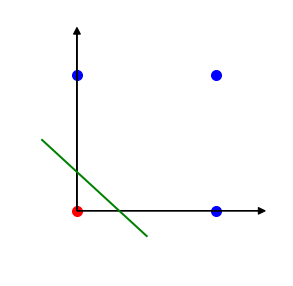

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)

# Plot the axis
plt.arrow(0, 0, 0, 1.3, head_width=0.05, head_length=0.05, fc='black')
plt.arrow(0, 0, 1.3, 0, head_width=0.05, head_length=0.05, fc='black')

for idx, x in enumerate(inputs):
    color = 'b' if targets[idx][0] == 1 else 'r'
    plt.scatter(x=x[0], y=x[1], s=100, c=color)

# helper function
def get_x2(x1):
    return -(W[0]*x1 - W[2]) / W[1]

p1 = (-0.25, get_x2(-0.25))
p2 = (0.5, get_x2(0.5))
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], '-', c='g', linewidth=2)
ax.axis('off')
plt.show();